### Задача

Уравнение Ван дер Поля - осциллятор с нелинейным затуханием  
$$
\frac{d^2 y}{dt^2} + a(y^2 - 1) \frac{dy}{dt} + y = 0, \quad y(0) = y_0 > 0, \quad y'(0) = 0, \quad 0 \leq t \leq 30, \quad 1 \leq a \leq 1000.
$$

1. Исследовать зависимость численных решений от параметров процессов;  
2. Исследовать сходимость численного решения по сетке;  
3. Использовать явный и неявный методы Рунге-Кутты 4-го порядка точности;  
4. Построить фазовый портрет.

In [262]:
# Используемые библиотеки
import numpy as np
import matplotlib.pyplot as plt

Перепишем уравнение Ван дер Поля в виде системы:
$$
\begin{equation*}
    \begin{cases}
      \frac{dy}{dt} = x \\
      \frac{dx}{dt} = a(1 - y^2) x - y
    \end{cases}\,.
\end{equation*}
$$

In [263]:
# Уравнение Ван дер Поля
def van_der_pol(xy_vec, t, a):
    y, x = xy_vec
    dydt = [x, a * (1 - y**2) * x - y]
    return dydt

Явный метод Рунге-Кутты четвёртого порядка:
$$ k_1 = h f(t_n, u_n), $$
$$ k_2 = h f(t_n + \frac{h}{2}, u_n + \frac{k_1}{2}), $$
$$ k_3 = h f(t_n + \frac{h}{2}, u_n + \frac{k_2}{2}), $$
$$ k_4 = h f(t_n + h, u_n + k_3), $$
$$ u_{n+1} = u_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}. $$

In [264]:
# Явный метод Рунге-Кутты 4-го порядка
def explicit_rk4_method(f, xy_vec0, t):
    N = len(t)
    try:
        n = len(xy_vec0)
    except TypeError:
        n = 1
    xy_vec = np.zeros((N, n))
    xy_vec[0] = xy_vec0

    for i in range(N - 1):
        h = t[i + 1] - t[i]
        k1 = np.array(f(xy_vec[i], t[i]))
        k2 = np.array(f(xy_vec[i] + h / 2 * k1, t[i] + h / 2))
        k3 = np.array(f(xy_vec[i] + h / 2 * k2, t[i] + h / 2))
        k4 = np.array(f(xy_vec[i] + h * k3, t[i] + h))
        xy_vec[i + 1] = xy_vec[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return xy_vec

Неявный метод Рунге-Кутты четвёртого порядка:
$$ k_1 = f\left(t_n + \left(\frac{1}{2} - \frac{\sqrt{3}}{6} \right) h, u_n + h \left(\frac{1}{4} k_1 + \left( \frac{1}{4} - \frac{\sqrt{3}}{6} \right) k_2 \right) \right), $$
$$ k_2 = f\left(t_n + \left(\frac{1}{2} + \frac{\sqrt{3}}{6} \right) h, u_n + h \left(\left( \frac{1}{4} + \frac{\sqrt{3}}{6} \right) k_1 + \frac{1}{4} k_2 \right) \right), $$
$$ u_{n+1} = u_n + h \left( \frac{1}{2} k_1 + \frac{1}{2} k_2 \right). $$

In [265]:
# Коэффициенты метода Гаусса-Лежандра 4-го порядка
c = np.array([0.5 - np.sqrt(3)/6, 0.5 + np.sqrt(3)/6])
A = np.array([[0.25, 0.25 - np.sqrt(3)/6], 
              [0.25 + np.sqrt(3)/6, 0.25]])
b = np.array([0.5, 0.5])

# Невный метод Рунге-Кутты 4-го порядка
def implicit_rk4_method(f, xy_vec0, t):
    N = len(t)
    n = len(xy_vec0)
    xy_vec = np.zeros((N, n))
    xy_vec[0] = xy_vec0
    
    for i in range(N - 1):
        h = t[i + 1] - t[i]

        # Функция для решения системы нелинейных уравнений
        def equations(k):
            k = k.reshape(2, n)
            k1, k2 = k[0], k[1]
            return np.concatenate([
                k1 - f(xy_vec[i] + h * (A[0, 0] * k1 + A[0, 1] * k2), t[i] + c[0] * h),
                k2 - f(xy_vec[i] + h * (A[1, 0] * k1 + A[1, 1] * k2), t[i] + c[1] * h)
            ])

        # Начальное приближение для k1 и k2
        k_initial = np.array([f(xy_vec[i], t[i]), f(xy_vec[i], t[i])]).flatten()

        # Решение системы уравнений методом Ньютона
        from scipy.optimize import fsolve
        k_solution = fsolve(equations, k_initial)
        k_solution = k_solution.reshape(2, n)
        k1, k2 = k_solution[0], k_solution[1]

        # Обновление xy_vec
        xy_vec[i + 1] = xy_vec[i] + h * (b[0] * k1 + b[1] * k2)
        
        xy_vec[i+1] = xy_vec[i] + h * (b[0] * k_solution[0] + b[1] * k_solution[1])
    
    return xy_vec

In [266]:
# Построение фазового портрета
def generate_phase_portrait(y, a):
    plt.plot(y[:, 0], y[:, 1], label=f'a = {a}')
    plt.title('Фазовый портрет уравнения Ван дер Поля')
    plt.xlabel('y')
    plt.ylabel("y'")
    plt.legend()
    plt.grid(True)
    plt.show()

> Решение, найденное явным методом Рунге-Кутты четвертого порядка для a = 10: -1.906589606753496


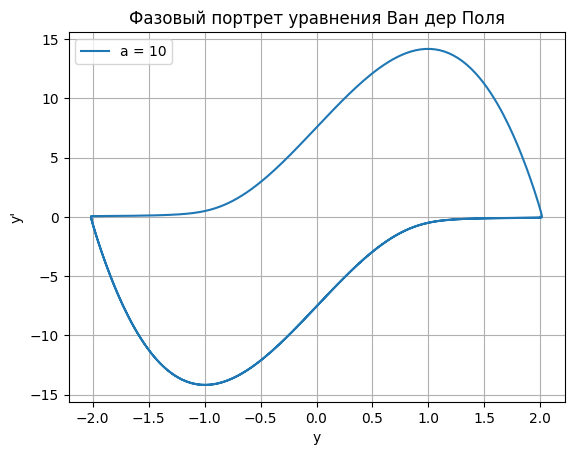

> Решение, найденное неявным методом Рунге-Кутты четвертого порядка для a = 10: -1.9065895492439502


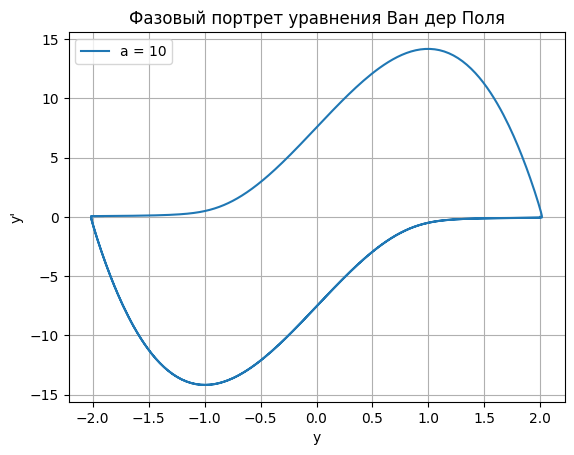

In [267]:
# Начальные условия (y(0) = y_0 > 0, y'(0) = 0)
xy_vec0 = [2.0, 0.0]

# Параметр a
a_value = 10

from functools import partial
van_der_pol_a = partial(van_der_pol, a = a_value)

# Сетка
t = np.linspace(0, 30, 10000)

y_explicit = explicit_rk4_method(van_der_pol_a, xy_vec0, t)
print(f"> Решение, найденное явным методом Рунге-Кутты четвертого порядка для a = {a_value}: {y_explicit[-1, 0]}")
generate_phase_portrait(y_explicit, a_value)

y_implicit = implicit_rk4_method(van_der_pol_a, xy_vec0, t)
print(f"> Решение, найденное неявным методом Рунге-Кутты четвертого порядка для a = {a_value}: {y_implicit[-1, 0]}")
generate_phase_portrait(y_implicit, a_value)


Исследуем зависимость численных решений от параметров процессов для явного метода Рунге-Кутты:

> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 100: 1.7794315698758116
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 90: 1.7516431623556066
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 80: 1.7156392416481956
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 70: 1.6669634983753798
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 60: 1.5969229033482637
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 50: 1.4849057585657512
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 40: 1.2491596391754032
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 30: -1.890134914108069
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 20: -1.4447861788090957
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 10: -1.9065895374892148


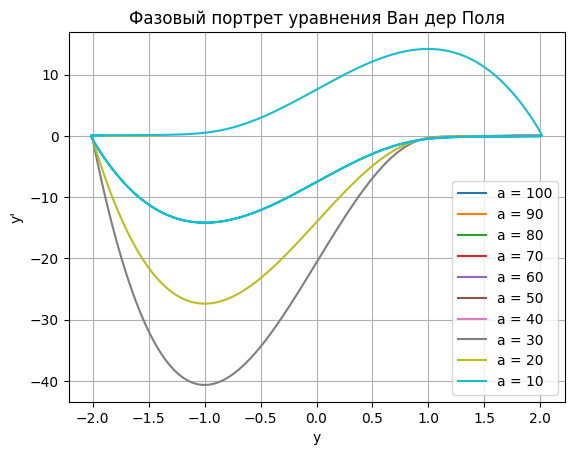

In [268]:
# Сетка
t = np.linspace(0, 30, 100000)

for a_value in range(100, 1, -10):
    van_der_pol_a = partial(van_der_pol, a = a_value)

    y = explicit_rk4_method(van_der_pol_a, xy_vec0, t)
    plt.plot(y[:, 0], y[:, 1], label=f'a = {a_value}')
    print(f"> Решение, найденное методом Рунге-Кутты четвертого порядка для a = {a_value}: {y[-1, 0]}")
    

plt.title('Фазовый портрет уравнения Ван дер Поля')
plt.legend()
plt.xlabel('y')
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.show()

> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: 1.8095508236623248


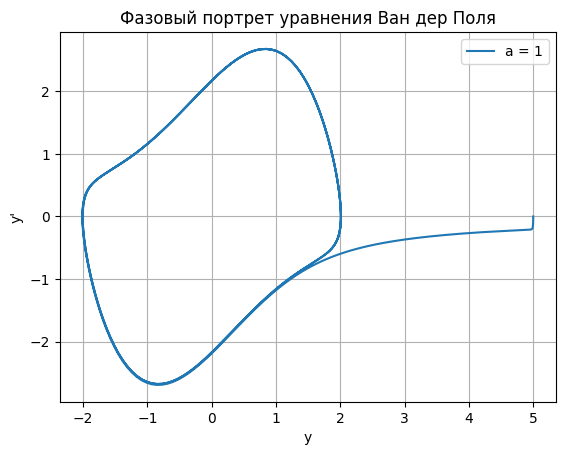

In [269]:
a_value = 1

# Сетка
t = np.linspace(0, 30, 1000)

van_der_pol_a = partial(van_der_pol, a = a_value)
xy_vec0 = [5, 0.0]

y = explicit_rk4_method(van_der_pol_a, xy_vec0, t)
plt.plot(y[:, 0], y[:, 1], label=f'a = {a_value}')
print(f"> Решение, найденное методом Рунге-Кутты четвертого порядка для a = {a_value}: {y[-1, 0]}")
    

plt.title('Фазовый портрет уравнения Ван дер Поля')
plt.legend()
plt.xlabel('y')
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.show()

> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: 0.0
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: -2.007910429467446
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: -1.054311580008789
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: 0.4855748397189655
> Решение, найденное методом Рунге-Кутты четвертого порядка для a = 1: 1.0135198966351024


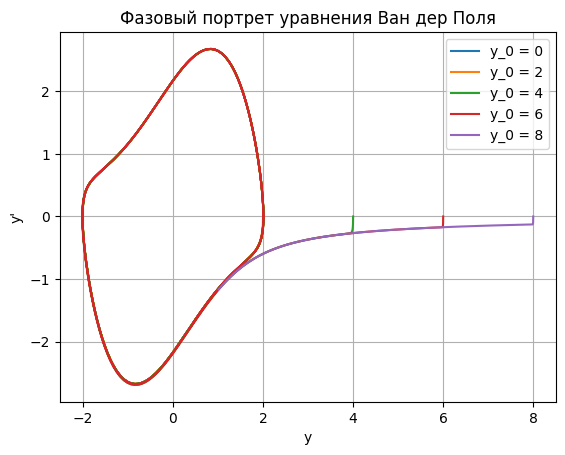

In [270]:
a_value = 1

# Сетка
t = np.linspace(0, 30, 1000)

for y_0 in range(0, 10, 2):
    van_der_pol_a = partial(van_der_pol, a = a_value)
    xy_vec0 = [y_0, 0.0]

    y = explicit_rk4_method(van_der_pol_a, xy_vec0, t)
    plt.plot(y[:, 0], y[:, 1], label=f'y_0 = {y_0}')
    print(f"> Решение, найденное методом Рунге-Кутты четвертого порядка для a = {a_value}: {y[-1, 0]}")
    

plt.title('Фазовый портрет уравнения Ван дер Поля')
plt.legend()
plt.xlabel('y')
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.show()